# KNN Classification model of Purchase
<img src='purchase.jpg'>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Extract Data

df=pd.read_csv('purchase.csv')
df.sample(1)

,User ID,Gender,Age,EstimatedSalary,Purchased
42,15624578,Male,27,39656,3


In [3]:
# Label encoder to normalised Gender data 
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [4]:
from sklearn.preprocessing import LabelEncoder
gender_1=LabelEncoder()
df['Gender_1']=gender_1.fit_transform(df['Gender'])
# df['Gender'].replace({'Female':0,'Male':1},inplace=True)

In [5]:
df.sample(1)

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_1
22,15624545,Male,25,19586,0,1


In [6]:
# Extracting Independent(x-axis veriable) and dependent (y-axis veriable)
df.drop(['User ID','Gender'],axis=1,inplace=True)
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [7]:
df.sample(1)

,Age,EstimatedSalary,Purchased,Gender_1
4,24,22487,1,0


In [ ]:
from ydata_profiling import ProfileReport
ProfileReport(df,title='purchase_profile_report.html')

In [8]:
# Spliting the dataframe into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y)

In [9]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)

In [10]:
x_train

array([[ 1.01387029, -1.27957201,  0.42257713],
       [ 1.37754115,  0.08937065,  0.42257713],
       [ 0.65019942,  0.47557765,  0.42257713],
       [ 1.37754115,  0.01135699, -2.36643191],
       [-1.53182576, -1.16263033,  0.42257713],
       [-0.80448403,  1.37241948,  0.42257713],
       [-1.53182576,  1.55870664,  0.42257713],
       [ 0.28652856, -1.1709045 ,  0.42257713],
       [ 1.01387029, -0.95766718,  0.42257713],
       [ 0.65019942, -1.3308719 ,  0.42257713],
       [-1.1681549 ,  0.03105741, -2.36643191],
       [-1.1681549 ,  0.0210496 ,  0.42257713],
       [ 0.65019942,  1.59582222,  0.42257713],
       [ 1.37754115, -1.39611968,  0.42257713],
       [ 0.65019942,  0.05296428,  0.42257713],
       [-1.1681549 ,  0.39551515,  0.42257713],
       [ 1.01387029, -1.14576677,  0.42257713],
       [-1.53182576,  0.04697535,  0.42257713],
       [ 0.28652856, -1.26357527, -2.36643191],
       [-1.1681549 ,  1.19141204, -2.36643191],
       [-0.44081317,  0.25832143,  0.422

In [11]:
# Fitting KNN classifier to set the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
#predicting the test set result
y_pred=classifier.predict(x_test)
y_pred

array([2, 0, 1, 2, 3, 0, 2, 3, 0, 0, 3], dtype=int64)

In [13]:
# Creating the confusion matrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[1, 0, 1, 1],
       [0, 0, 0, 1],
       [1, 1, 2, 0],
       [2, 0, 0, 1]], dtype=int64)

<Axes: >

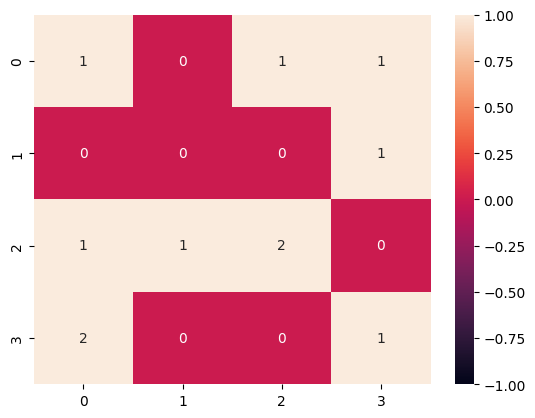

In [19]:
import seaborn as sns
sns.heatmap(cm,annot=True,vmin=-1, vmax=1)

In [ ]:
classifier.score(x_test,y_test)